In [1]:
import pandas as pd

housing = pd.read_csv('../dataset/housing.csv')

housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [2]:
from ydata_profiling import ProfileReport

In [3]:
profile = ProfileReport(housing, title="housing dataset report")
profile.to_file("housing_report.html")


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

100%|██████████| 10/10 [00:00<00:00, 105.73it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [6]:
import dtale

d = dtale.show(housing)
d.open_browser()

In [7]:
d.kill()

2025-05-02 16:00:34,737 - INFO     - Executing shutdown...
2025-05-02 16:00:34,738 - INFO     - Not running with the Werkzeug Server, exiting by searching gc for BaseWSGIServer


---

# Create Test Train Split

In [8]:
from sklearn.model_selection import train_test_split

In [ ]:
train, test = train_test_split(housing, test_size=0.2, random_state=364)

print(train.shape)
print(test.shape)

(16512, 10)
(4128, 10)


In [13]:
housing.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [15]:
housing['median_income'].describe()

count    20640.000000
mean         3.870671
std          1.899822
min          0.499900
25%          2.563400
50%          3.534800
75%          4.743250
max         15.000100
Name: median_income, dtype: float64

In [16]:
import numpy as np

In [17]:
bin = [0., 1.5, 3.0, 4.5, 6., np.inf]
labels = [1, 2, 3, 4, 5]
housing['income_cat'] = pd.cut(housing['median_income'], bins=bin, labels=labels)

In [18]:
housing.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity', 'income_cat'],
      dtype='object')

In [21]:
housing['income_cat'].value_counts(normalize=True) * 100

income_cat
3    35.058140
2    31.884690
4    17.630814
5    11.443798
1     3.982558
Name: proportion, dtype: float64

In [23]:
strat_train, strat_test = train_test_split(housing, 
                                           test_size=0.2, 
                                           random_state=364, 
                                           stratify=housing['income_cat'])

print(strat_train.shape)
print(strat_train['income_cat'].value_counts(normalize=True) * 100) 

print(strat_test.shape)
print(strat_test['income_cat'].value_counts(normalize=True) * 100)

(16512, 11)
income_cat
3    35.059351
2    31.885901
4    17.629603
5    11.446221
1     3.978924
Name: proportion, dtype: float64
(4128, 11)
income_cat
3    35.053295
2    31.879845
4    17.635659
5    11.434109
1     3.997093
Name: proportion, dtype: float64


In [25]:
housing = strat_train.drop('median_house_value', axis=1)
housing_labels = strat_train['median_house_value'].copy()

In [27]:
housing_labels.head()

7140     224500.0
9897     153000.0
9938     187500.0
12895    183200.0
6541     161200.0
Name: median_house_value, dtype: float64

# Data Cleaning


In [28]:
housing['total_bedrooms'].isnull().sum()

np.int64(179)

In [31]:
housing.dtypes

longitude              float64
latitude               float64
housing_median_age     float64
total_rooms            float64
total_bedrooms         float64
population             float64
households             float64
median_income          float64
ocean_proximity         object
income_cat            category
dtype: object

In [34]:
housing_num = housing.select_dtypes(include=['float64'])

In [35]:
housing_cat = housing.select_dtypes(include=['object'])

In [42]:
from sklearn.impute import SimpleImputer

num_imputer = SimpleImputer(strategy='median')
# num_imputer.fit(housing_num)

# print(num_imputer.statistics_)

# X_num = num_imputer.transform(housing_num)

X_num = num_imputer.fit_transform(housing_num)


In [43]:
housing_tr = pd.DataFrame(X_num, columns=housing_num.columns)

housing_tr.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
dtype: int64

In [50]:
import matplotlib.pyplot as plt

%matplotlib inline

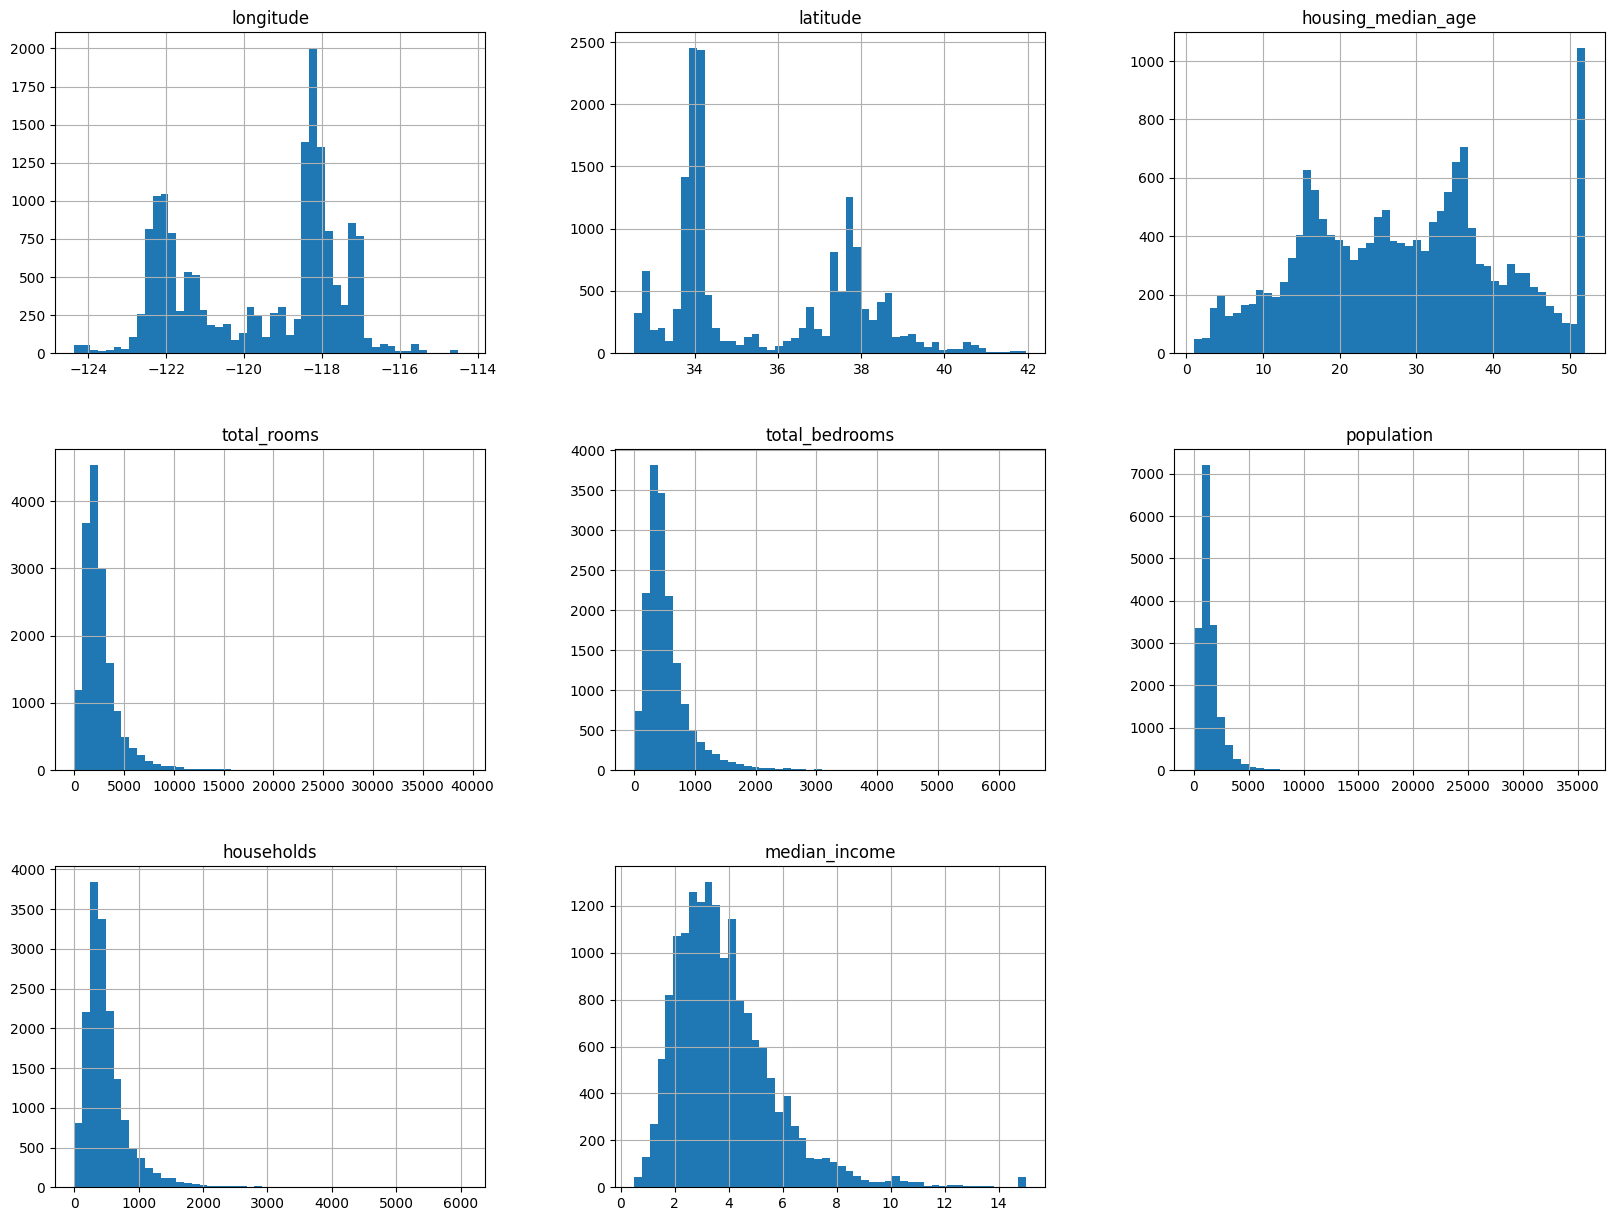

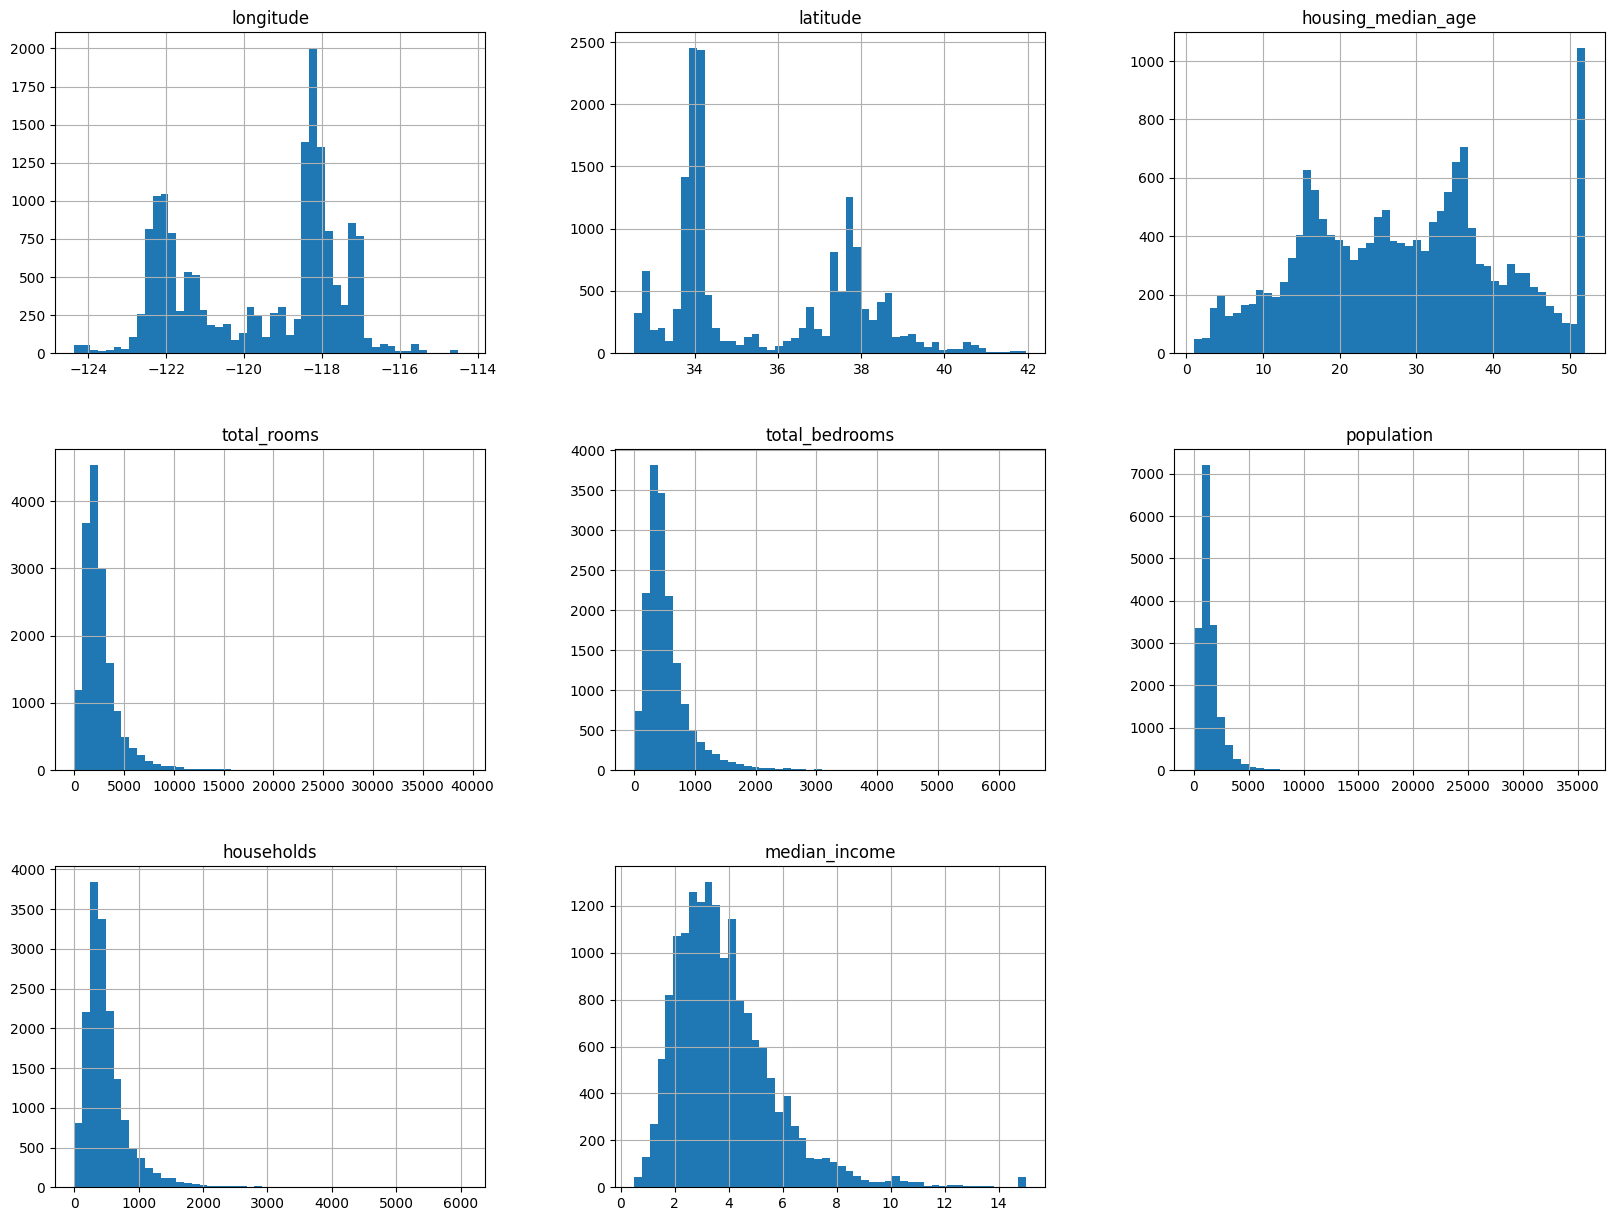

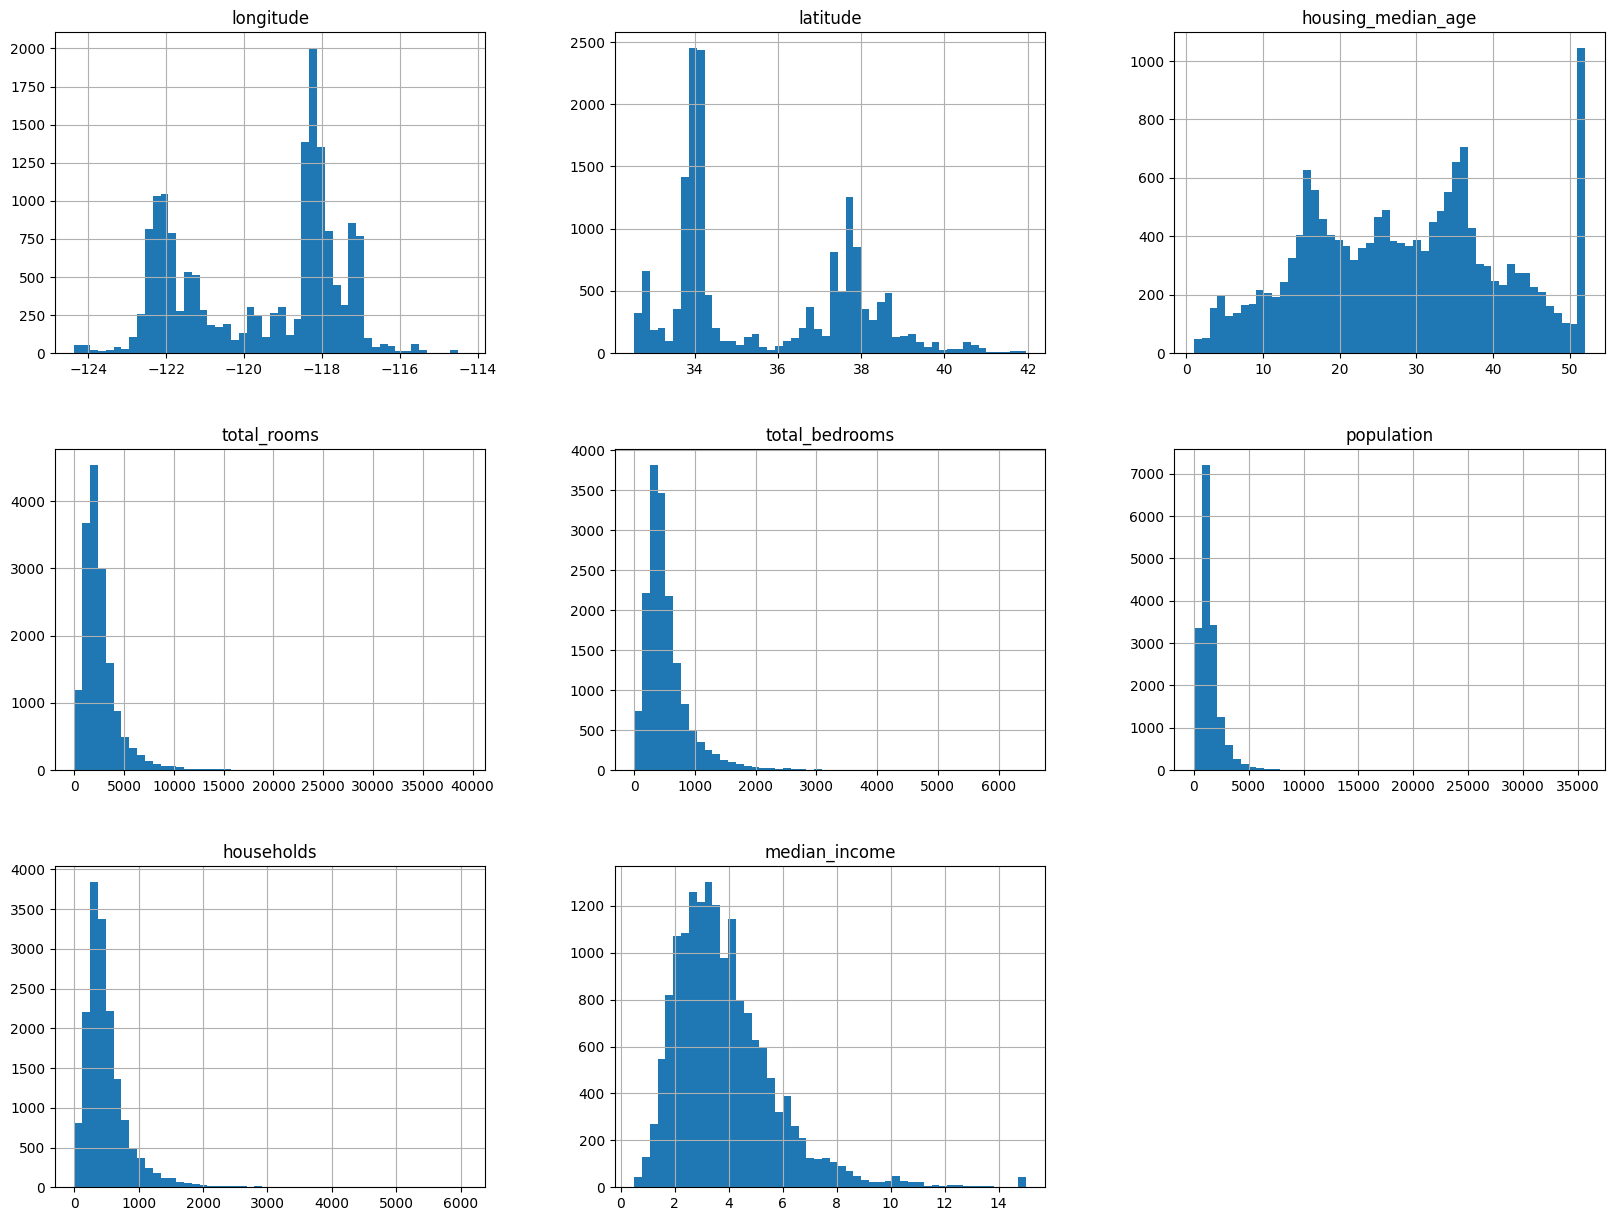

In [51]:
housing_tr.hist(bins=50, figsize=(20, 15))
plt.show()

In [52]:
from sklearn.preprocessing import StandardScaler

In [53]:
std_scaler = StandardScaler()
housing_num_std_scaled = std_scaler.fit_transform(housing_tr)

In [54]:
housing_num_std_scaled_df = pd.DataFrame(housing_num_std_scaled, columns=housing_num.columns)

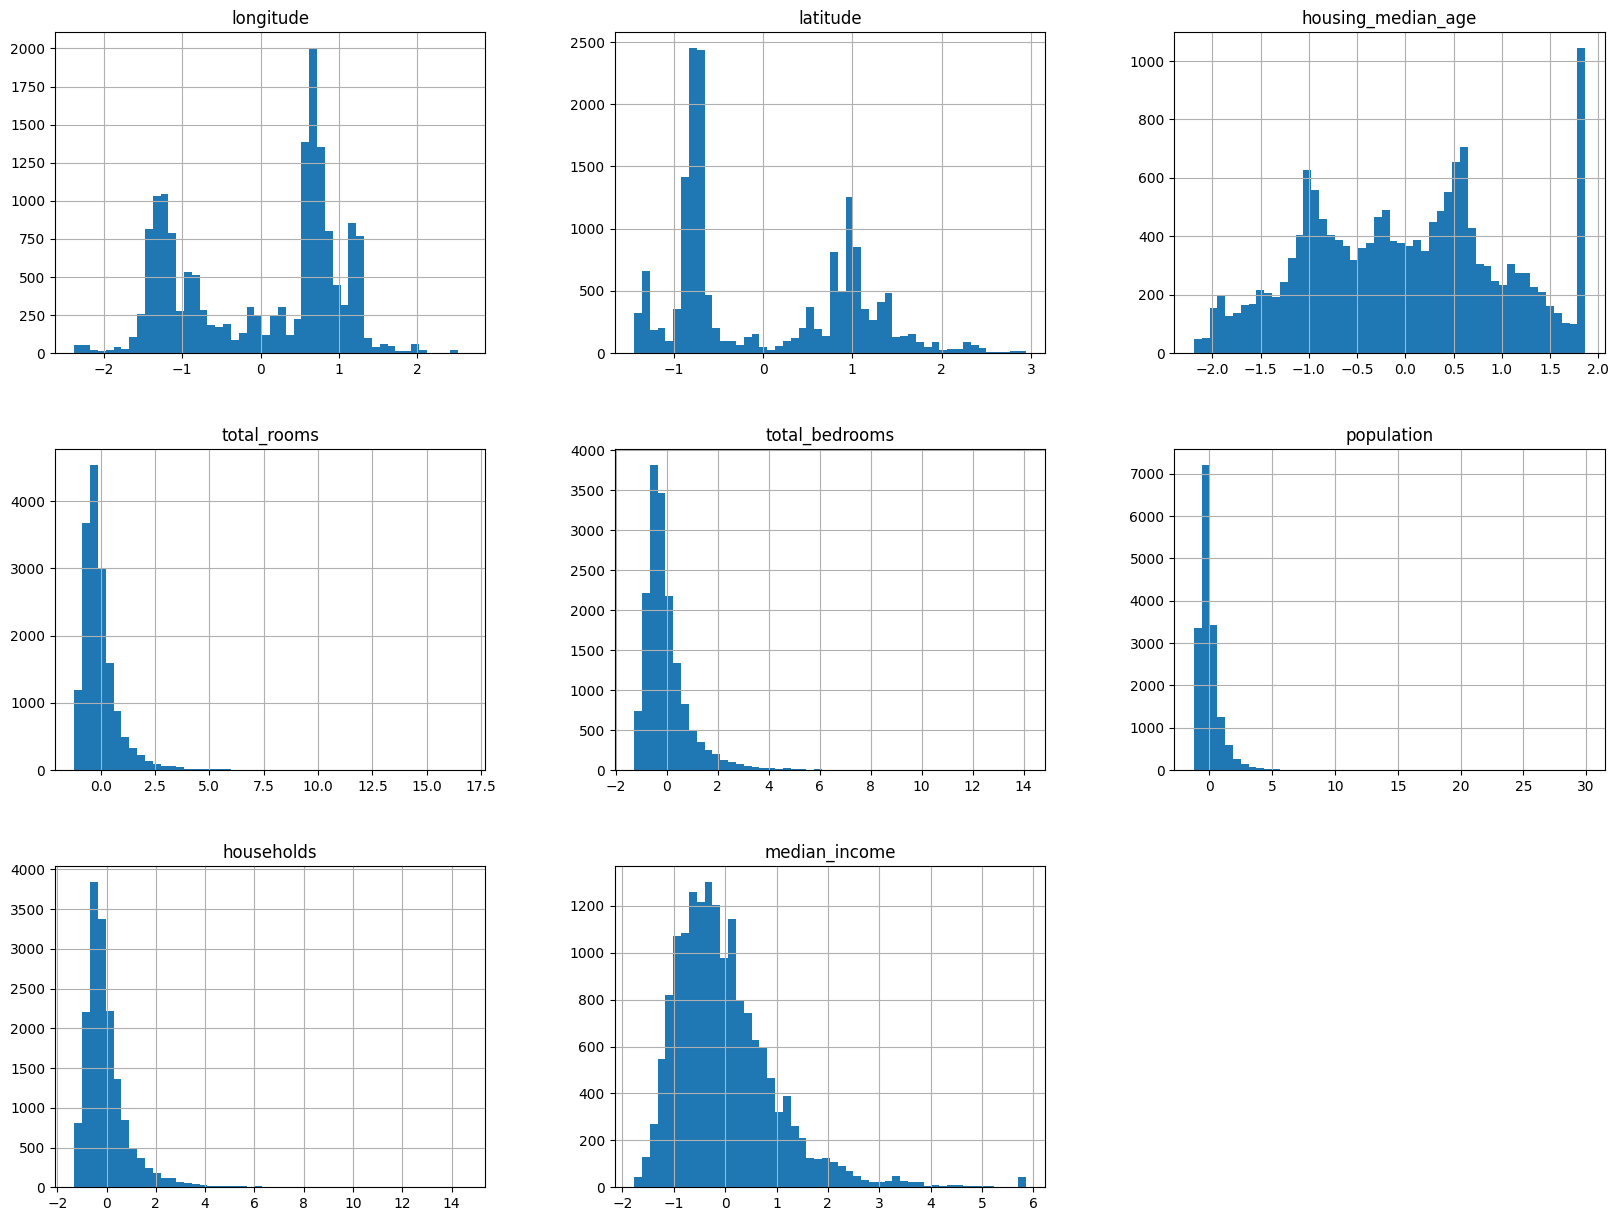

In [55]:
housing_num_std_scaled_df.hist(bins=50, figsize=(20, 15))
plt.show()

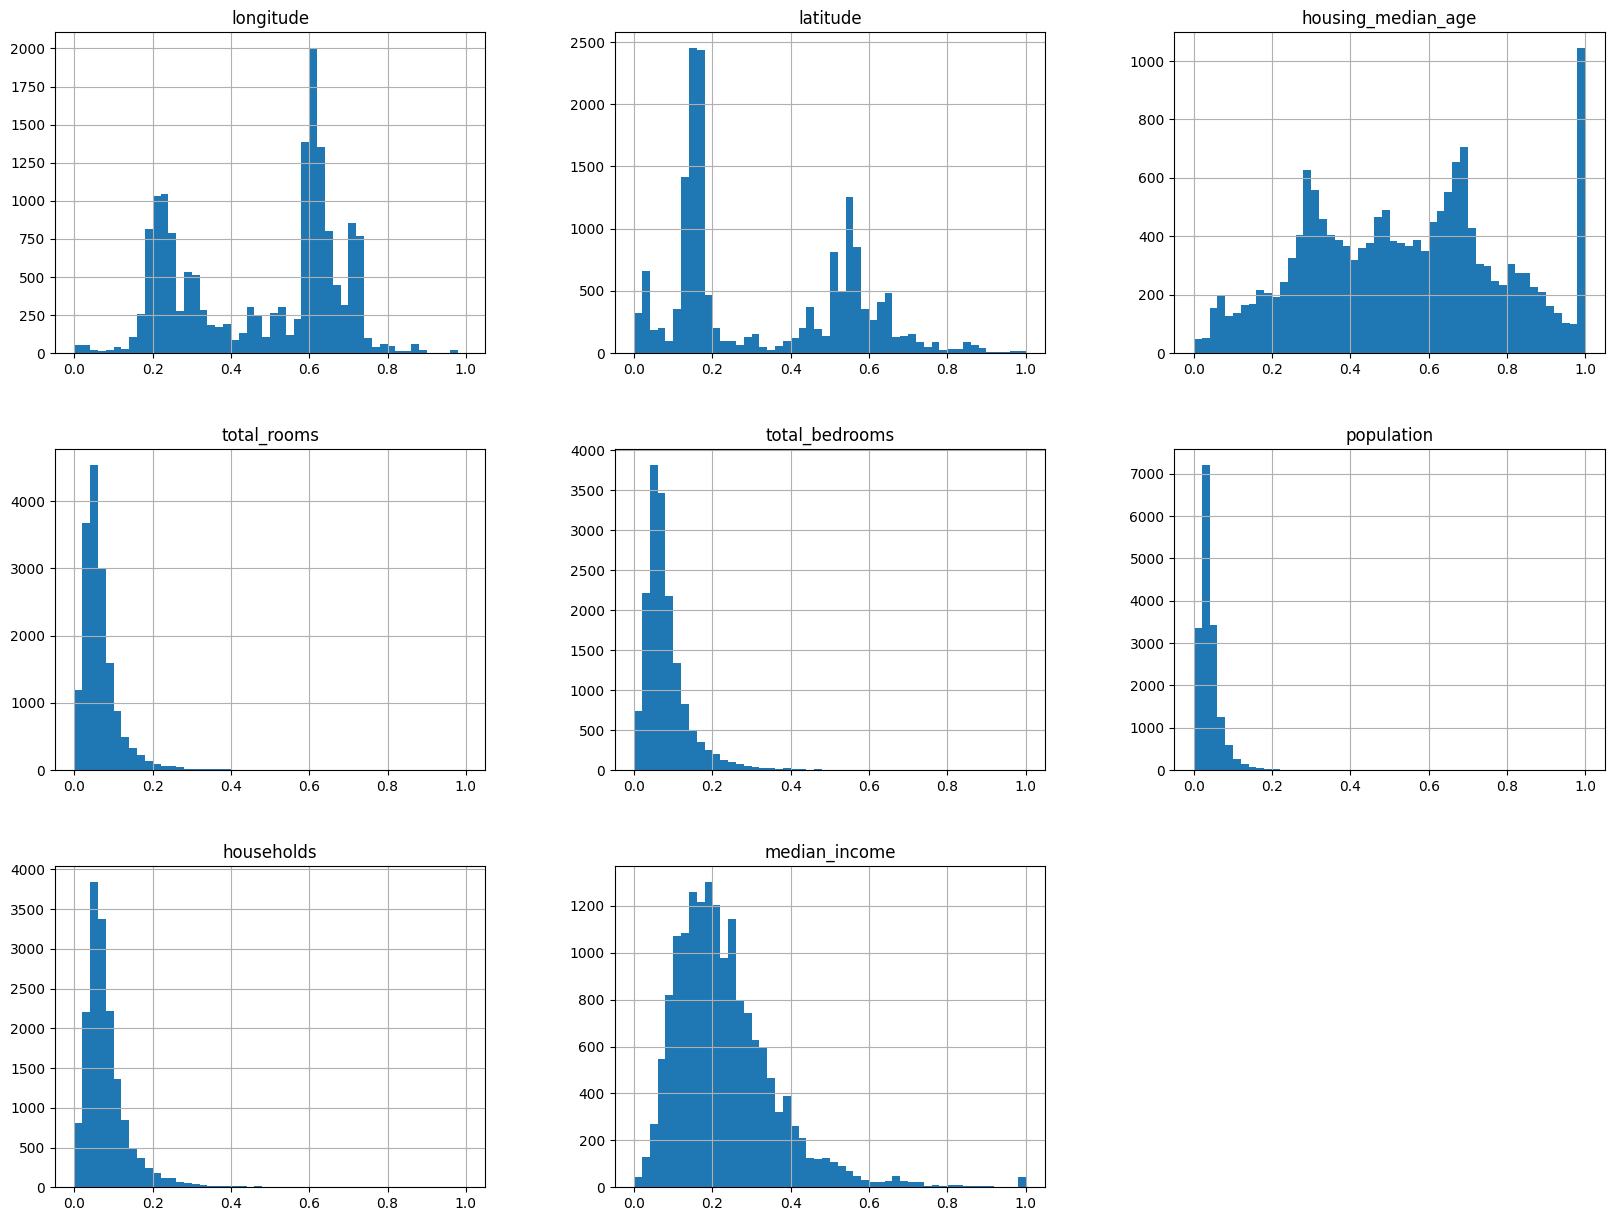

In [56]:
from sklearn.preprocessing import MinMaxScaler
minmax_scaler = MinMaxScaler()
housing_num_minmax_scaled = minmax_scaler.fit_transform(housing_tr)
housing_num_minmax_scaled_df = pd.DataFrame(housing_num_minmax_scaled, columns=housing_num.columns)
housing_num_minmax_scaled_df.hist(bins=50, figsize=(20, 15))
plt.show()

In [58]:
housing_cat = housing[['ocean_proximity']]
housing_cat.value_counts()

ocean_proximity
<1H OCEAN          7292
INLAND             5260
NEAR OCEAN         2136
NEAR BAY           1819
ISLAND                5
Name: count, dtype: int64

In [59]:
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder()
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)
housing_cat_encoded[:10]

array([[0.],
       [3.],
       [3.],
       [1.],
       [0.],
       [4.],
       [0.],
       [0.],
       [1.],
       [1.]])

In [60]:
ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [61]:
from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)   

In [64]:
housing_cat_1hot.toarray()

array([[1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       ...,
       [0., 0., 0., 1., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

In [65]:
housing_cat_1hot_df = pd.DataFrame(housing_cat_1hot.toarray(), 
                                   columns=cat_encoder.get_feature_names_out())
housing_cat_1hot_df.head()

,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,1.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,1.0,0.0
3,0.0,1.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0


In [66]:
housing_num_std_scaled_df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,0.723680,-0.755602,0.273634,-0.390606,-0.023359,0.001565,0.043245,-1.041374
1,-1.341699,1.234862,0.591652,-0.547729,-0.552454,-0.654833,-0.536387,-0.541802
2,-1.326769,1.216216,0.353138,-1.112545,-1.195947,-1.167889,-1.220457,0.549443
3,-0.873878,1.402676,-0.362402,0.408291,0.484287,0.060125,0.581102,-0.557731
4,0.758518,-0.746279,0.353138,-0.592621,-0.242623,-0.287739,-0.635603,0.220882


In [67]:
housing_tr_df = pd.concat([housing_num_std_scaled_df, housing_cat_1hot_df], axis=1)
housing_tr_df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,0.723680,-0.755602,0.273634,-0.390606,-0.023359,0.001565,0.043245,-1.041374,1.0,0.0,0.0,0.0,0.0
1,-1.341699,1.234862,0.591652,-0.547729,-0.552454,-0.654833,-0.536387,-0.541802,0.0,0.0,0.0,1.0,0.0
2,-1.326769,1.216216,0.353138,-1.112545,-1.195947,-1.167889,-1.220457,0.549443,0.0,0.0,0.0,1.0,0.0
3,-0.873878,1.402676,-0.362402,0.408291,0.484287,0.060125,0.581102,-0.557731,0.0,1.0,0.0,0.0,0.0
4,0.758518,-0.746279,0.353138,-0.592621,-0.242623,-0.287739,-0.635603,0.220882,1.0,0.0,0.0,0.0,0.0


In [70]:
housing_tr_df.shape
housing_labels.shape

(16512,)

# Build Models

In [71]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(housing_tr_df, housing_labels)

lin_reg.coef_

array([-51512.70629261, -52382.09301711,  13317.86474695, -11370.96122193,
        31669.97175312, -44425.34261012,  28900.64374749,  73989.46800476,
       -23636.03258704, -64055.96104908, 133132.70124748, -27061.03050594,
       -18379.67710542])

In [72]:
from sklearn.metrics import mean_squared_error

housing_predictions = lin_reg.predict(housing_tr_df)
lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

np.float64(68493.61797344818)

# Pipelines

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn import set_config
set_config(display='diagram')

In [74]:
num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('std_scaler', StandardScaler()),
    ('minmax_scaler', MinMaxScaler())
])
num_pipeline

Pipeline(steps=[('imputer', SimpleImputer(strategy='median')),
                ('std_scaler', StandardScaler()),
                ('minmax_scaler', MinMaxScaler())])

In [75]:
cat_pipeline = Pipeline([
    ('cat_imputer', SimpleImputer(strategy='most_frequent')),
    ('one_hot_encoder', OneHotEncoder(handle_unknown='ignore'))
])
cat_pipeline

Pipeline(steps=[('cat_imputer', SimpleImputer(strategy='most_frequent')),
                ('one_hot_encoder', OneHotEncoder(handle_unknown='ignore'))])

In [78]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16512 entries, 7140 to 13438
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   longitude           16512 non-null  float64 
 1   latitude            16512 non-null  float64 
 2   housing_median_age  16512 non-null  float64 
 3   total_rooms         16512 non-null  float64 
 4   total_bedrooms      16333 non-null  float64 
 5   population          16512 non-null  float64 
 6   households          16512 non-null  float64 
 7   median_income       16512 non-null  float64 
 8   ocean_proximity     16512 non-null  object  
 9   income_cat          16512 non-null  category
dtypes: category(1), float64(8), object(1)
memory usage: 1.3+ MB


In [79]:
num_attributes = ['longitude', 'latitude', 'housing_median_age', 'total_rooms', 
                  'total_bedrooms', 'population', 'households', 'median_income']
cat_attributes = ['ocean_proximity']

In [80]:
from sklearn.compose import ColumnTransformer

preprocessing_pipeline = ColumnTransformer([
    ('num', num_pipeline, num_attributes),
    ('cat', cat_pipeline, cat_attributes)
])

preprocessing_pipeline

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('std_scaler',
                                                  StandardScaler()),
                                                 ('minmax_scaler',
                                                  MinMaxScaler())]),
                                 ['longitude', 'latitude', 'housing_median_age',
                                  'total_rooms', 'total_bedrooms', 'population',
                                  'households', 'median_income']),
                                ('cat',
                                 Pipeline(steps=[('cat_imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('one_hot_encoder',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['ocean_proximity'])])

In [81]:
from sklearn.linear_model import LinearRegression

lin_reg_pipeline = Pipeline([
    ('preprocessing', preprocessing_pipeline),
    ('lin_model', LinearRegression())
])
lin_reg_pipeline

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('std_scaler',
                                                                   StandardScaler()),
                                                                  ('minmax_scaler',
                                                                   MinMaxScaler())]),
                                                  ['longitude', 'latitude',
                                                   'housing_median_age',
                                                   'total_rooms',
                                                   'total_bedrooms',
                                                   'population', 'households',
                                                   'median_income']),
                                                 ('cat',
                                                  Pipeline(steps=[('cat_imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('one_hot_encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['ocean_proximity'])])),
                ('lin_model', LinearRegression())])

In [82]:
lin_model = lin_reg_pipeline.fit(housing, housing_labels)

In [83]:
from sklearn.tree import DecisionTreeRegressor

tree_reg_pipeline = Pipeline([
    ('preprocessing', preprocessing_pipeline),
    ('model', DecisionTreeRegressor())
])
tree_reg_pipeline

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('std_scaler',
                                                                   StandardScaler()),
                                                                  ('minmax_scaler',
                                                                   MinMaxScaler())]),
                                                  ['longitude', 'latitude',
                                                   'housing_median_age',
                                                   'total_rooms',
                                                   'total_bedrooms',
                                                   'population', 'households',
                                                   'median_income']),
                                                 ('cat',
                                                  Pipeline(steps=[('cat_imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('one_hot_encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['ocean_proximity'])])),
                ('model', DecisionTreeRegressor())])

In [84]:
tree_model = tree_reg_pipeline.fit(housing, housing_labels)